In [5]:
import pandas as pd

In [6]:
#read the csv file
netflix = pd.read_csv('netflix_data.csv')
print(netflix)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [7]:
#select a subset of column release year and duration
year_duration = netflix[['release_year', 'duration']]
print(year_duration)

      release_year  duration
0             2020         4
1             2016        93
2             2011        78
3             2009        80
4             2008       123
...            ...       ...
7782          2005        99
7783          2015       111
7784          2019        44
7785          2019         1
7786          2019        90

[7787 rows x 2 columns]


In [9]:
#select the range of rows with release year between 2011 and 2020
movie_dict = year_duration[(year_duration["release_year"] > 2010) & (year_duration["release_year"] < 2021)]
print(movie_dict)

      release_year  duration
0             2020         4
1             2016        93
2             2011        78
5             2016         1
6             2019        95
...            ...       ...
7780          2018        94
7783          2015       111
7784          2019        44
7785          2019         1
7786          2019        90

[6406 rows x 2 columns]


In [10]:
#calculate the mean of the duration grouped by release year
durations_df = movie_dict.groupby(["release_year"]).mean('duration')
print(durations_df)

               duration
release_year           
2011          78.987952
2012          73.082192
2013          75.127341
2014          73.658683
2015          70.987061
2016          69.657596
2017          70.213439
2018          63.553970
2019          55.382530
2020          43.440092


In [11]:
type(durations_df)

pandas.core.frame.DataFrame

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
plt.plot(durations_df["release_year"], durations_df["duration"], marker = '0')
plt.xlabel('release_year')
plt.ylabel('duration')
plt.title('Netflix Movie Durations 2011-2020')
plt.show()

KeyError: 'release_year'

In [21]:
netflix.df = pd.read_csv('netflix_data.csv')
netflix.df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [22]:
#Subset the netflix_df DataFrame such that only rows where the type is a "Movie" are preserved. Assign the result to netflix_df_movies_only.
netflix_df_movies_only = netflix.df[netflix.df["type"] == "Movie"]
print(netflix_df_movies_only)

     show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 

In [23]:
# Subset the netflix_df_movies_only DataFrame to preserve only the columns title, country, genre, release_year, and duration. Assign the result to netflix_movies_col_subset
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

In [24]:
#Print the first five rows of netflix_movies_col_subset.
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


<function matplotlib.pyplot.show(close=None, block=None)>

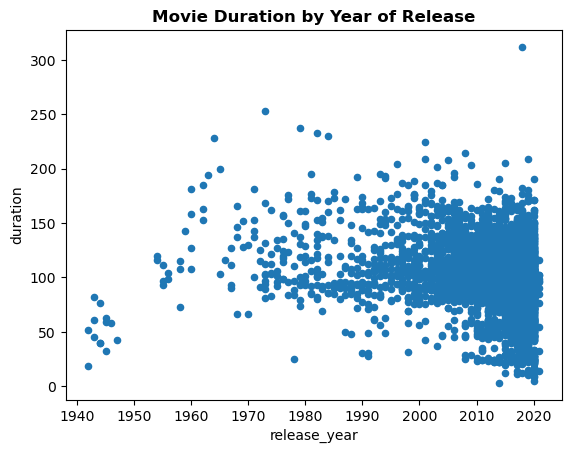

In [25]:
#Using your netflix_movies_col_subset DataFrame, create a scatter plot, placing the release_year on the x-axis and the movie duration on the y-axis
netflix_movies_col_subset.plot.scatter(x="release_year", y="duration")
#Add a title to your plot: "Movie Duration by Year of Release"
plt.title("Movie Duration by Year of Release", fontweight = 'bold')
#Show the plot
plt.show

In [26]:
#Subset netflix_movies_col_subset to create a new DataFrame short_movies containing only movies that have a duration fewer than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

In [27]:
#Print the first 20 rows of short_movies to get a good overview of the types of films with a short duration
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [28]:
# Initialize an empty list called colors to store our different color values
colors = []

In [37]:
#Use a for loop to iterate through the netflix_movies_col_subset DataFrame's rows and append colors to your colors list based on the following conditions:
#If the genre is "Children", append "red"
#If the genre is "Documentaries", append "blue"
#If the genre is "Stand-Up", append "green"
#If the genre is any other genre, append "black".
colors = []
for index, row in netflix_movies_col_subset.iterrows():
    genre = row['genre']
    if genre =="Children":
        colors.append('red')
    elif genre == "Documentaries" :
        colors.append('blue')
    elif genre == "Stand-Up" :
        colors.append('green')  
    else:
        colors.append('black')

In [38]:
# Print the first 10 values of your colors list to inspect the results
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


<function matplotlib.pyplot.show(close=None, block=None)>

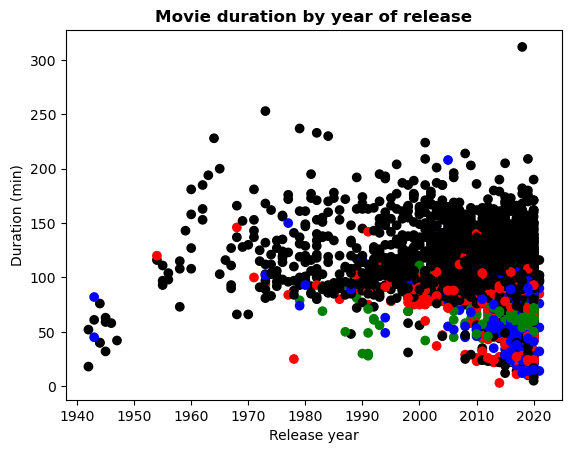

In [39]:
#Using the data contained in netflix_movies_col_subset, plot the same scatter plot as you did in Task 6, but with a few modifications:
#Color the points on the scatter plot using your colors list you defined in the previous step
#Add a title "Movie duration by year of release", an x-axis label "Release year", and a y-axis label "Duration (min)"
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c = colors)
plt.title("Movie duration by year of release", fontweight = 'bold')
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
#Show the plot.
plt.show

In [4]:
#Provide your answer to the question "Are we certain that movies are getting shorter?" in the form of a string.
print("NO, movies are not getting shorter as fluctuation exists in movie duration between years")

NO, movies are not getting shorter as fluctuation exists in movie duration between years
